In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from preprocess import get_data
from sklearn.metrics import mean_squared_error

In [2]:
from preprocess import get_data, load_train_data, load_test_data

In [3]:
X_train, y_train, X_test = get_data()

0            V1
1            V0
2            V8
3           V31
4      SHIFT_V0
5            V2
6      SHIFT_V1
7            V4
8           V12
9           V37
10          V16
11    SHIFT_V31
12           V3
13     SHIFT_V2
14          V20
15          V10
16           V6
17          V36
18           V7
19          V24
20          V23
21          V13
Name: feature, dtype: object


In [4]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=SGDRegressor(alpha=0.01, eta0=0.1, fit_intercept=True, l1_ratio=1.0, learning_rate="constant", loss="epsilon_insensitive", penalty="elasticnet", power_t=10.0)),
    StackingEstimator(estimator=SGDRegressor(alpha=0.0, eta0=0.01, fit_intercept=False, l1_ratio=0.0, learning_rate="invscaling", loss="epsilon_insensitive", penalty="elasticnet", power_t=0.1)),
    StandardScaler(),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.8, min_samples_leaf=11, min_samples_split=6, n_estimators=100)),
    LinearSVR(C=0.01, dual=True, epsilon=0.0001, loss="epsilon_insensitive", tol=0.01)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

In [5]:
X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, random_state=42, shuffle=False)

In [6]:
exported_pipeline.fit(X_train_, y_train_)
y_pred = exported_pipeline.predict(X_valid)

In [7]:
# print(mean_squared_error(y_pred[:15], y_valid.values[:15]))
# print(mean_squared_error(y_train, np.mean([X_train['V0'], X_train['V1'], X_train['V2'], X_train['V31']], axis=0)))
print(mean_squared_error(y_valid, y_pred))

0.1570308427142523


In [8]:
X_valid.columns

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V13',
       'V16', 'V20', 'V23', 'V24', 'V31', 'V36', 'V37', 'SHIFT_V0', 'SHIFT_V1',
       'SHIFT_V2', 'SHIFT_V31'],
      dtype='object')

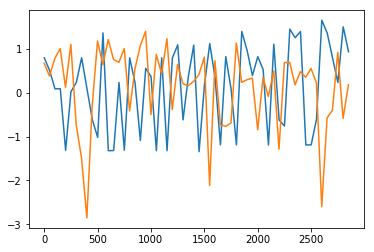

In [9]:
# plt.plot(y_train.values[100:200])

# plt.plot(X_train.iloc[::50, :]['V8'])
plt.plot(X_train.iloc[::50, :]['V24'])
# plt.plot(X_train.iloc[::50, :]['V31'])
# plt.plot(pd.DataFrame(np.mean([X_train['V1'], X_train['V2'], X_train['V31']], axis=0)).iloc[::50, :])
plt.plot(y_train.iloc[::50])


In [10]:
np.mean([X_train.iloc[::200, :]['V1'], X_train.iloc[::200, :]['V2'], X_train.iloc[::200, :]['V31']], axis=0)

array([ 0.17366931, -0.07497902, -1.27441444,  0.98614449, -0.1126501 ,
       -1.39598745, -0.20666296,  0.63640372,  0.36956465,  0.63928793,
        0.26947032, -0.89671142,  0.4646702 , -1.67743344, -0.27096296])